# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [ ]:
print("Yukai Chen \n S2539356")

<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [3]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/bmi.csv"
    - **Note that the column `Height` is in $cm$, and `Weight` is in $kg$**
- Write a lambda function for $ BMI = \frac{weight (kg)}{height (m)^2} $
- Use ```list(map(...))``` to calculate $BMI$ for each row of the dataset
- Round the outcome into 2 decimal points
- Store the calculation in a new column in the dataframe called `BMI`
- Display the dataframe


In [15]:
# Write your own code here
bmi = pd.read_csv("data/bmi.csv")
bmi_calc = lambda weight,height: round(weight/((height/100)**2),2)
bmi["BMI"] = list(map(bmi_calc,bmi["Weight"],bmi["Height"]))
bmi

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.71
1,Male,189,87,2,24.36
2,Female,185,110,4,32.14
3,Female,195,104,3,27.35
4,Male,149,61,3,27.48
...,...,...,...,...,...
495,Female,150,153,5,68.00
496,Female,184,121,4,35.74
497,Female,141,136,5,68.41
498,Male,150,95,5,42.22


<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" <br>

- This is a dataset containing the proportion  <br>
of urban population by country in 2020

<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

- Print the original `countryname` and the newly created column, like: <br>
"['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ......] "

In [12]:
# Write your own code here
wdi_2020 = pd.read_csv("data/wdi_2020.csv")
fn_upper = lambda x:x.upper()
wdi_2020["countryname_upper"] = wdi_2020["countryname"].apply(fn_upper)
print(wdi_2020[["countryname","countryname_upper"]])

                     countryname            countryname_upper
0                    Afghanistan                  AFGHANISTAN
1    Africa Eastern and Southern  AFRICA EASTERN AND SOUTHERN
2     Africa Western and Central   AFRICA WESTERN AND CENTRAL
3                        Albania                      ALBANIA
4                        Algeria                      ALGERIA
..                           ...                          ...
261           West Bank and Gaza           WEST BANK AND GAZA
262                        World                        WORLD
263                  Yemen, Rep.                  YEMEN, REP.
264                       Zambia                       ZAMBIA
265                     Zimbabwe                     ZIMBABWE

[266 rows x 2 columns]


<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in ascending order
- Subset the 5 countries with the lowest urban population

In [17]:
# Write your code here
sorted_wdi = wdi_2020.sort_values(by='prop_urbanpopulation',ascending=True)
low_country = sorted_wdi.iloc[:5]
low_country

,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
191,2020,YR2020,Papua New Guinea,PNG,13.345,PAPUA NEW GUINEA
34,2020,YR2020,Burundi,BDI,13.708,BURUNDI
141,2020,YR2020,Liechtenstein,LIE,14.416,LIECHTENSTEIN
177,2020,YR2020,Niger,NER,16.626,NIGER
149,2020,YR2020,Malawi,MWI,17.427,MALAWI


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the 25 quantile value of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" higher the 25 quantile

**hint: Import ```numpy``` and use `np.nanpercentile`**

In [19]:
# Write your own code here
import numpy as np
threshold = np.nanpercentile(wdi_2020["prop_urbanpopulation"],0.25)
wdi_2020.query("prop_urbanpopulation > @threshold")

,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
0,2020,YR2020,Afghanistan,AFG,26.026000,AFGHANISTAN
1,2020,YR2020,Africa Eastern and Southern,AFE,36.828301,AFRICA EASTERN AND SOUTHERN
2,2020,YR2020,Africa Western and Central,AFW,47.857831,AFRICA WESTERN AND CENTRAL
3,2020,YR2020,Albania,ALB,62.112000,ALBANIA
4,2020,YR2020,Algeria,DZA,73.733000,ALGERIA
...,...,...,...,...,...,...
261,2020,YR2020,West Bank and Gaza,PSE,76.719000,WEST BANK AND GAZA
262,2020,YR2020,World,WLD,56.063764,WORLD
263,2020,YR2020,"Yemen, Rep.",YEM,37.908000,"YEMEN, REP."
264,2020,YR2020,Zambia,ZMB,44.629000,ZAMBIA


<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


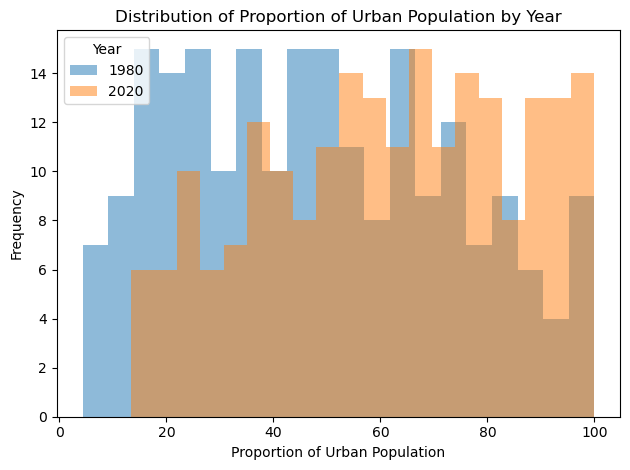

In [27]:
# Write your own code here
wdi_urban = pd.read_csv("data/wdi_urban.csv")
year = np.unique(wdi_urban["year"])

for year in year:
    subset = wdi_urban[wdi_urban['year'] == year]['prop_urbanpopulation']
    plt.hist(subset, bins=20, alpha=0.5, label=str(year))

# Add labels, title, and legend
plt.xlabel('Proportion of Urban Population')
plt.ylabel('Frequency')
plt.title('Distribution of Proportion of Urban Population by Year')
plt.legend(title='Year')
plt.tight_layout()